In [18]:
import csv
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

%matplotlib inline
data = pd.read_csv('SongCSV.csv')
print(data.head(1))

   SongNumber              SongID            ArtistID ArtistName  \
0           1  SOMZWCG12A8C13C480  ARD7TVE1187B99BFB1     Casual   

           SongName  YearRelease    AlbumName  \
0  bI Didnt Mean To            0  Fear Itself   

                           HashCode  Danceability  Energy  KeySignature  \
0  a222795e07cd65b7a530f1346f520649           0.0     0.0             1   

   KeyConfidence  Loudness  Mode  ModeConf   Tempo  TimeSignature  \
0          0.736   -11.197     0     0.636  92.198              4   

   TimeConfidence  
0           0.778  


In [6]:
test = data[['KeySignature','Tempo','TimeSignature','Loudness']]
#test = data[['KeySignature','Tempo']]
print(test.head(10))

   KeySignature    Tempo  TimeSignature  Loudness
0             1   92.198              4   -11.197
1             6  121.274              4    -9.843
2             8  100.070              1    -9.689
3             0  119.293              4    -9.013
4             2  129.738              4    -4.501
5             5  147.782              3    -9.323
6             1  111.787              1   -17.302
7             4  101.430              3   -11.642
8             4   86.643              4   -13.496
9             7  114.041              4    -6.697


In [15]:
X = StandardScaler().fit_transform(test)
spectral = cluster.SpectralClustering(n_clusters=2,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=.2)
## Use the algorithms
spectral_labels = spectral.fit_predict(X)
dbscan_labels = dbscan.fit_predict(X)
print(dbscan_labels)

[ 0  1 -1 ...,  0  2  3]


For n_clusters = 10000 The average silhouette_score is : -0.765003006192


AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

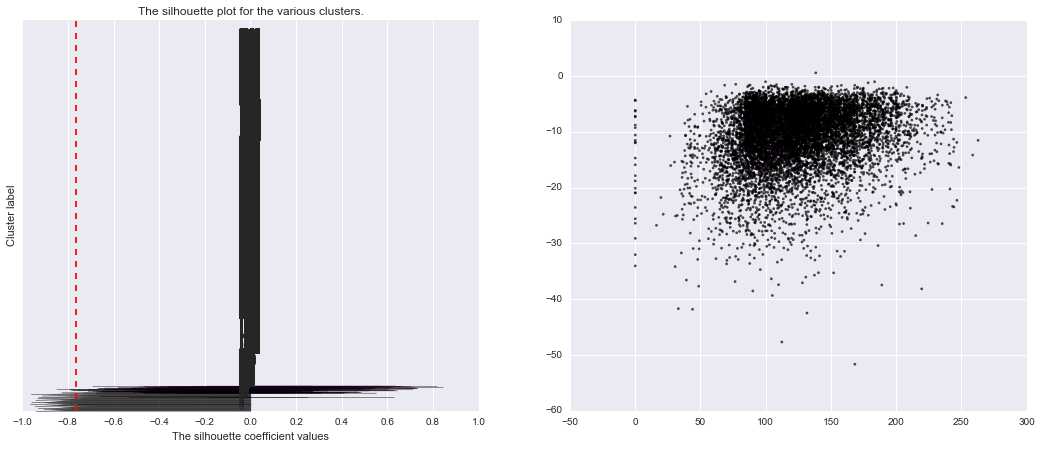

In [35]:
range_n_clusters = [len(dbscan_labels)]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(test) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    X = StandardScaler().fit_transform(test)
    dbscan_clustered = cluster.DBSCAN(eps=.2)
    ## Use the algorithms
    dbscan_labels = dbscan.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(test, dbscan_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(test, dbscan_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[dbscan_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.spectral(dbscan_labels.astype(float) / n_clusters)
    # 2nd Plot showing the actual clusters formed
    ax2.scatter(test.values[:,1], test.values[:,3], marker='.', s=30, lw=0, alpha = 0.7, c=colors)

    # Labeling the clusters
    centers = dbscan_clustered.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 1], centers[:, 3],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[3], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
